In [3]:
#Function that returns True if variable is normally distributed, False if it is skewed. Takes in a dataframe, the target variable and the confidence value NOTE: Uses KS Test
def is_normally_distributed(df,variable, confidence):
    from scipy.stats import normaltest
    result = normaltest(df[variable])
    if(result.pvalue < confidence): return False
    else: return True

#Function that returns a new df without the outliers based on 2 values: upper and lower limits. Takes in a dataframe, the target variable, upper and lower limit  NOTE: You can get the limits by using get_outliers_limits function
def trim_outliers(df,variable, upper,lower):
    new_df = df[(df[variable]<upper) & (df[variable] > lower)]
    return new_df

#Function that returns the upper and lower limit depending on the distribution of the variable
def get_outliers_limits(df,variable,isNormal=True):
        if(isNormal):
            #If variable is normally distributed, find the upper and lower limits using the emipirical relations of normal distribution [mean-3*sigma, mean+3*sigma]
            print('Normal Distribution:')
            upper_limit = df[variable].mean() + 3*df['horsepower'].std()
            lower_limit = df[variable].mean() - 3*df['horsepower'].std()
        else:
             #If variable is skewed, find the upper and lower limits using IQR [Q1 – 1.5 IQR, Q3 + 1.5 IQR ]
            print('Skewed Distribution:')    
            percentile25 = df[variable].quantile(0.25)
            percentile75 = df[variable].quantile(0.75)

            from scipy.stats import iqr
            iqr = iqr(selection_df[variable])

            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
        
        #Get the outliers based on the upper and lower limits
        high_outliers = df[df[variable] > upper_limit]
        low_outliers = df[df[variable] < lower_limit]

        #If there are no outliers found, print message. Else, print the outliers
        if(not(high_outliers.empty)):
            high_outliers=high_outliers[variable]
        else:
            high_outliers = 'No high outliers found.'
         #If there are no outliers found, print message. Else, print the outliers
        if(not(low_outliers.empty)):
            low_outliers=low_outliers[variable]
        else:
            low_outliers = 'No low outliers found.'

        class Result:
            def __init__(self):
                self.upper_limit = upper_limit
                self.lower_limit = lower_limit
                self.high_outliers = high_outliers
                self.low_outliers = low_outliers

        return Result()
   

Skewed Distribution:
Upper Limit:  27894.0
Lower limit:  -4530.0
Outliers: 
 ----------------
 High:
 15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
65     34184.0
66     35056.0
67     40960.0
68     45400.0
114    31400.5
Name: price, dtype: float64 
----------------
 Low:
 No low outliers found.


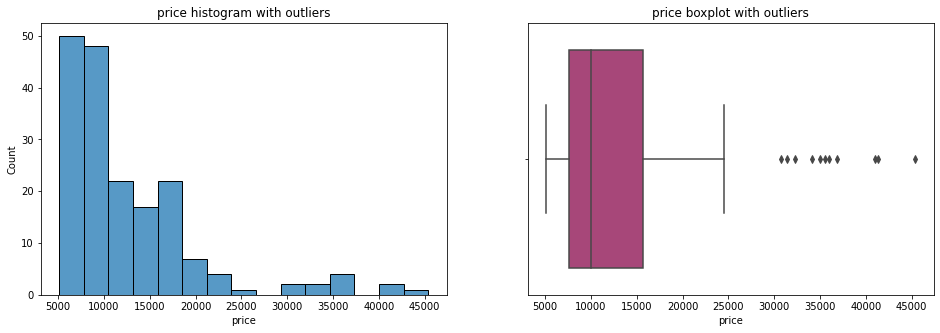

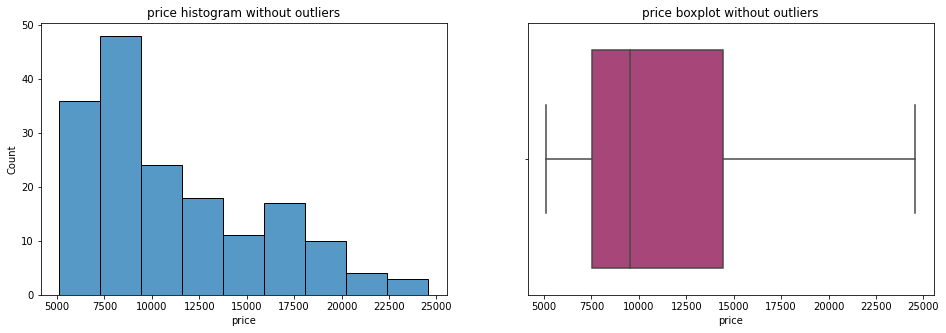

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selection_df = pd.read_excel('./Data/car_data_selection.xlsx')

#Set the confidence value, used for testing if variable is normally distributed
confidence = 0.05
#Set the variable for which the operations below are executed
current_variable = 'price'
#Check if the variable is normally distributed. If the distribution is skewed, isNormal is set to False. 
isNormal = is_normally_distributed(selection_df, current_variable, confidence)

#Gets the limits and outliers, if any are found
result = get_outliers_limits(selection_df,current_variable, isNormal)

print("Upper Limit: ",result.upper_limit)
print("Lower limit: ", result.lower_limit)
print("Outliers: \n","----------------\n", "High:\n", result.high_outliers, "\n----------------\n", "Low:\n", result.low_outliers)

#NOTE: if clean_active is set to True, found outliers will be trimmed based on the found limits
clean_active = True

if(clean_active):
    clean_df = trim_outliers(selection_df, current_variable, result.upper_limit, result.lower_limit)

#Plots the distribution of the current_variable 
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title(current_variable +' histogram with outliers')
sns.histplot(data=selection_df, x=current_variable)

plt.subplot(1,2,2)
plt.title(current_variable +' boxplot with outliers')
sns.boxplot(x=selection_df[current_variable],palette=("magma"))

plt.show()

#Plots the distribution of the current_variable after outliers were removed
if(clean_active):
    plt.figure(figsize=(16,5))

    plt.subplot(1,2,1)
    plt.title(current_variable +' histogram without outliers')
    sns.histplot(data=clean_df, x=current_variable)

    plt.subplot(1,2,2)
    plt.title(current_variable +' boxplot without outliers')
    sns.boxplot(x=clean_df[current_variable],palette=("magma"))

    plt.show()

#Export the clean_df after outliers were removed
clean_df.to_excel('./Data/car_data_clean.xlsx', index=False)

#Rewrite the selection with the outliers removed
clean_df.to_excel('./Data/car_data_selection.xlsx', index=False)






